# Simple Analysis of IPL 2021
#### **By Ika Nurfitriani**

## About Dataset
The IPL 2022 Mega Player auction have featured a total of 600 players who were set to go under the hammer in Bengaluru. The initial list had over 1000 cricketers who had registered for the auction. However, the final list was trimmed to 590. There was a total of 217 slots spread across ten franchises up for grabs. Among the 600 players, 229 are capped players, 371 are uncapped players.<br>
The dataset includes Data of all sold and unsold players.<br>
Data Columns:<br>
- Index Number
- Player Name
- Base Price
- Type of the player
- Total Cost in Cr Indian Rupees
- Total Cost in USD
- Team of the Player in 2021
- Team of the Player in 2022

# A. Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# B. Data Loading

In [2]:
df_match = pd.read_csv("IPL_Matches_2008-2020.csv")
df_ball = pd.read_csv("IPL_Ball-by-Ball_2008-2020.csv")

df_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
df_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
df_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [6]:
df_match.shape

(816, 17)

In [7]:
df_ball.shape

(193468, 18)

In [8]:
df_match.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

# C. Data Cleaning

In [9]:
df_ball.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [10]:
# df_ball.dropna(inplace=True)

# df_ball.isnull().sum()

In [11]:
df_match.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [12]:
# df_match.dropna(inplace=True)

# df_match.isnull().sum()

In [13]:
print("Jumlah duplicated data dari df_ball =", df_ball.duplicated().sum())
print("Jumlah duplicated data dari df_match =", df_match.duplicated().sum())

Jumlah duplicated data dari df_ball = 1
Jumlah duplicated data dari df_match = 0


# D. Exploratory Data Analysis (EDA)

In [14]:
print('Matchs played so far:', df_match.shape[0])
print('\nCities played at:', df_match['city'].unique())
print('\nTeams participated:', df_match['team1'].unique())

Matchs played so far: 816

Cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

Teams participated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [15]:
df_match['Season'] = pd.DatetimeIndex(df_match['date']).year
df_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [16]:
match_per_season = df_match.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


Text(0.5, 1.0, 'Total matches played in each season')

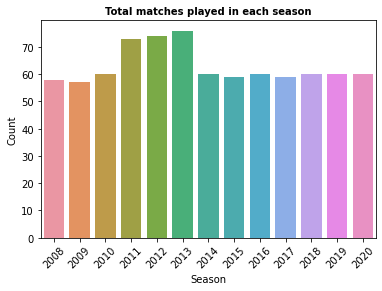

In [17]:
sns.countplot(df_match['Season'])
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total matches played in each season', fontsize=10, fontweight='bold')

In [18]:
season_data=df_match[['id','Season']].merge(df_ball, left_on='id', right_on='id', how='left').drop('id', axis=1)

In [19]:
season_data

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


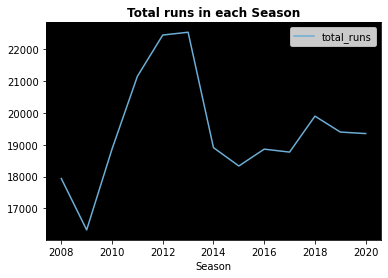

In [21]:
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season.set_index('Season')
ax = plt.axes()
ax.set(facecolor='black')
sns.lineplot(data=p, palette='Blues_r')
plt.title('Total runs in each Season', fontsize=12, fontweight='bold')
plt.show()

In [23]:
runs_per_season = pd.concat([match_per_season, season.iloc[:,1]], axis=1)
runs_per_season['Runs scored per match'] = runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season', inplace=True)
runs_per_season

,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


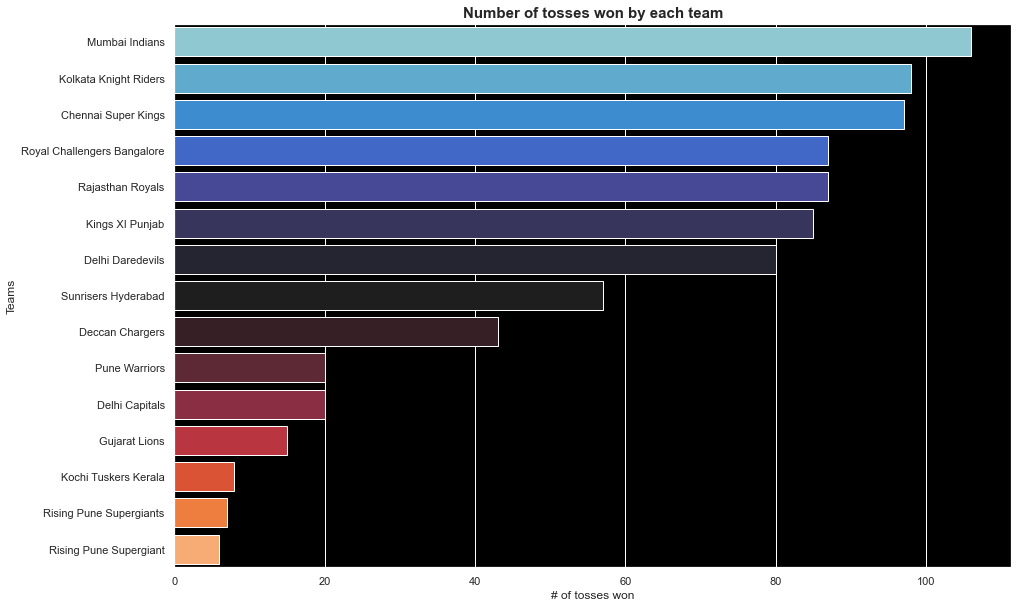

In [27]:
toss = df_match['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor='black')
sns.set(rc={'figure.figsize':(15,10)}, style='darkgrid')
ax.set_title('Number of tosses won by each team', fontsize=15, fontweight='bold')
sns.barplot(y=toss.index, x=toss, orient='h', palette='icefire', saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

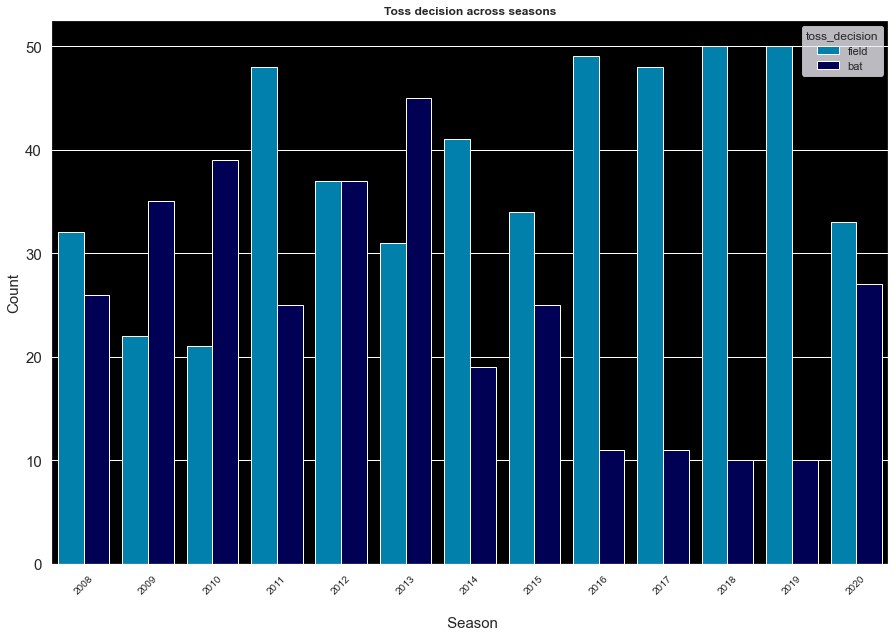

In [32]:
ax = plt.axes()
ax.set(facecolor='black')
sns.countplot(x='Season', hue='toss_decision', data=df_match, palette='ocean_r', saturation=1)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Season', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Toss decision across seasons', fontsize=12, fontweight='bold')
plt.show()

In [33]:
df_match['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [34]:
df_match.venue[df_match.result!='runs'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [35]:
df_match.venue[df_match.result!='wickets'].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [36]:
df_match.venue[df_match.result!='tie'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [37]:
df_match.venue[df_match.toss_winner=='Mumbai Indians'][df_match.winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
Name: venue, dtype: object

In [38]:
df_match.venue[df_match.toss_winner=='Kolkata Knight Riders'][df_match.winner=='Kolkata Knight Riders'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [39]:
df_match.winner[df_match.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

In [40]:
df_match.winner[df_match.result!='wickets'].mode()

0    Mumbai Indians
Name: winner, dtype: object

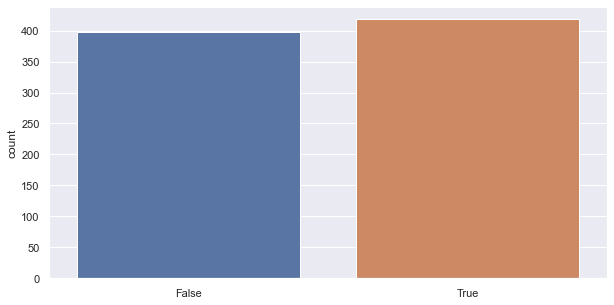

In [42]:
toss = df_match['toss_winner'] == df_match['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

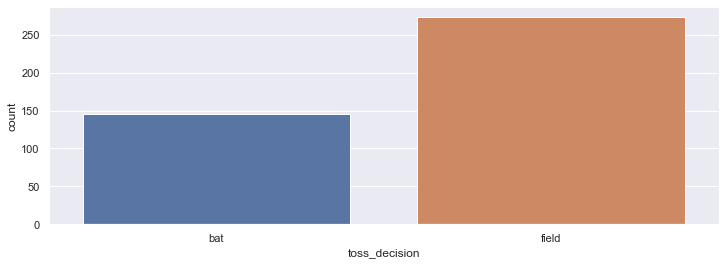

In [43]:
plt.figure(figsize=(12,4))
sns.countplot(df_match.toss_decision[df_match.toss_winner == df_match.winner])
plt.show()

In [44]:
player = (df_ball['batsman'] == 'SK Raina')
df_raina = df_ball[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


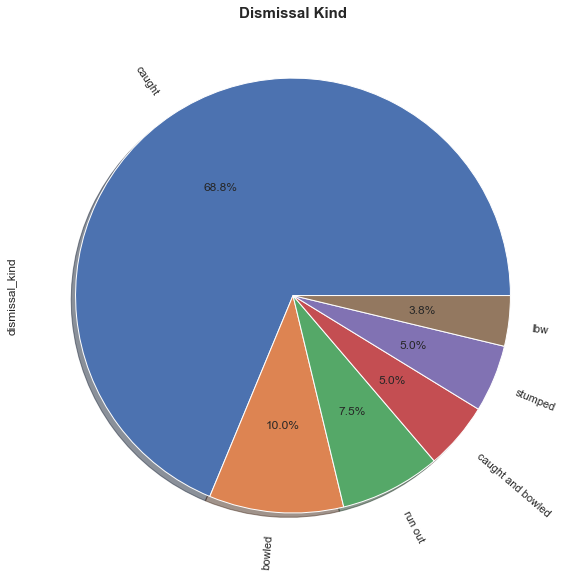

In [45]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=True)
plt.title('Dismissal Kind', fontweight='bold', fontsize=15)
plt.show()

In [46]:
def count(df_raina, runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs

In [47]:
print("Runs scored from 1's : ", count(df_raina, 1))
print("Runs scored from 2's : ", count(df_raina, 2))
print("Runs scored from 3's : ", count(df_raina, 3))
print("Runs scored from 4's : ", count(df_raina, 4))
print("Runs scored from 5's : ", count(df_raina, 5))

Runs scored from 1's :  1666
Runs scored from 2's :  528
Runs scored from 3's :  33
Runs scored from 4's :  1972
Runs scored from 5's :  5


In [48]:
df_match[df_match['result_margin']==df_match['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [50]:
runs = df_ball.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman', 'runs']
y = runs.sort_values(by='runs', ascending=False).head(10).reset_index().drop('index', axis=1)
y

,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


Text(0.5, 1.0, 'Top 10 run scores in IPL 2021')

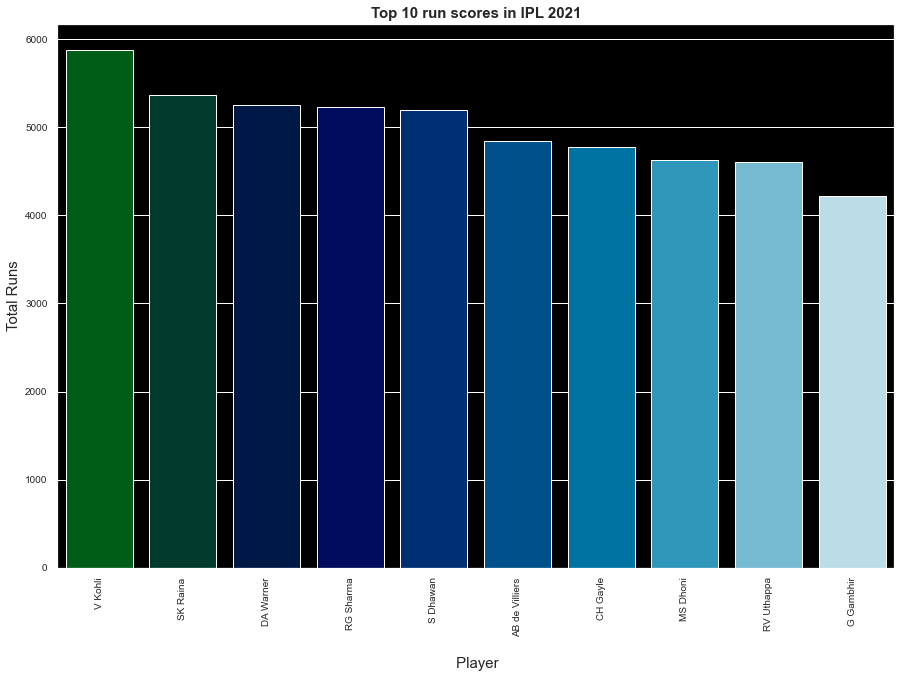

In [54]:
ax = plt.axes()
ax.set(facecolor='black')
sns.barplot(x=y['Batsman'], y=y['runs'], palette='ocean', saturation=1)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player', fontsize=15)
plt.ylabel('Total Runs', fontsize=15)
plt.title('Top 10 run scores in IPL 2021', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Highest MOM award winners')

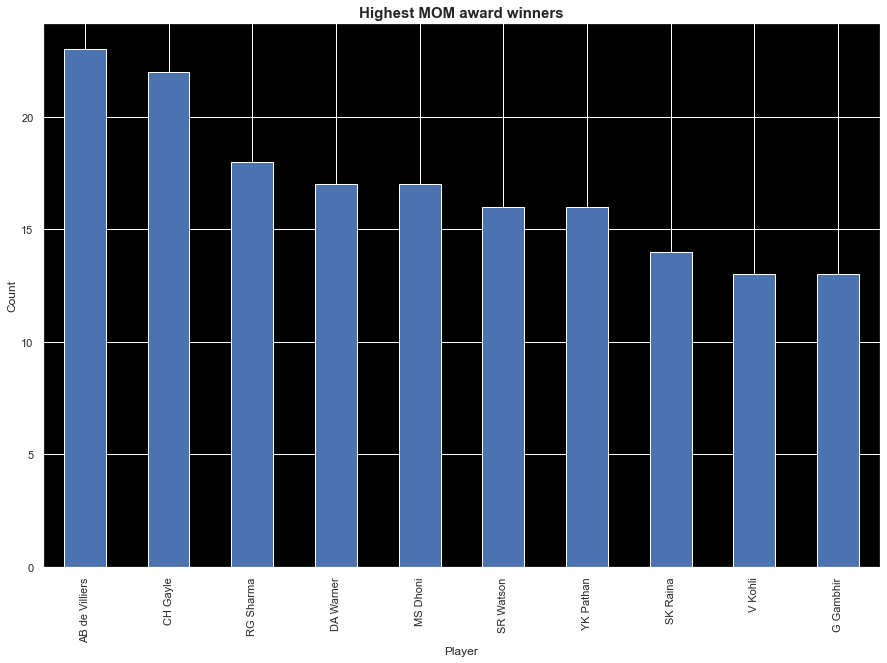

In [55]:
ax = plt.axes()
ax.set(facecolor='black')
df_match.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Highest MOM award winners', fontsize=15, fontweight='bold')